<a href="https://colab.research.google.com/github/DrDAN6770/ccClub_2023/blob/main/ccClub%20Judge/Problem%20List/Problem_List4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#停車費 II

---


Description

承停車費，台大除了社科院停車場之外，還有其他停車場如：水源、校總區等。

為了能夠設計一套停車費計費系統，讓每個停車場都可以使用。

請實作parking_fee函式，計算停車費，該函式具備以下參數：

* fee_rate：型態為 int，代表該停車場每半小時的停車費率。以停車費為例，fee_rate 即為 20。
* is_vip：型態為 bool，代表該車是否具備台大證件。具備台大證件可享 (1) 停車費半價優惠 (2) 若停車未滿 30 分鐘，則免收停車費。
* entry_time：型態為 str，代表該車進入停車場的時間，格式為 hh:mm。ex：18:30 代表晚上 6 點半進入停車場。
* exit_time：型態為 str，代表該車離開停車場的時間，格式為 hh:mm。ex：22:30 代表晚上 10 點半離開停車場。
* 為了方便計算，停車場暫不提供跨夜停車，即每輛車皆會在 23:59（含）前離開。

備註：若停車 0 分鐘，則停車費 0 元。



本題僅需實作parking_fee函式，並將停車費回傳，型態為 int。

你不需要處理 input 和 output 的格式，我們會將他讀入，並呼叫你寫的parking_fee函式，並將結果輸出。

你可以直接複製 hint 中提供的程式碼，專心實作parking_fee函式，讓他符合題目的要求。


Input
輸入有四行，分別為停車費率、是否具備台大證件、進場時間、離場時間。


Output
輸出有一行，包含一個整數，代表該車的停車費。

In [6]:
def parking_fee(fee_rate, is_vip, entry_time, exit_time):
  def minscalcator(entry_time,exit_time):
    entertime = list(map(int, entry_time.split(':')))
    exittime = list(map(int, exit_time.split(':')))
    return (exittime[0] - entertime[0]) * 60 + (exittime[1] - entertime[1])
  
  time = minscalcator(entry_time, exit_time)

  halfhourcount = time // 30
  remain = time % 30

  if time <= 1:
    return 0
  else:
    if remain != 0:
      halfhourcount += 1
    fee = halfhourcount * fee_rate
  
  if is_vip:
    if time < 30:
      return 0
    return int(fee/2)
  else:
    return fee

parking_fee(30, True, "00:00", "00:02")

0

# 連四相乘

---


Description

給定 k 個（k >= 4）依數大小由小至大排序的整數，找出這些數中挑 4 個數字相乘的最大值。


Input
輸入為一行，包含 k 個整數（k >= 4），數字以空白為間隔。


Output
輸出為一行，包含一個整數。

In [ ]:
def muti4(k):
  # 正零、負
  positive = [num >= 0 for num in k]
  negative = [num < 0 for num in k]
  
  # 都是非負 or 一個負
  if all(positive) or sum(negative) == 1:
    return k[-1] * k[-2] * k[-3] * k[-4]
  
  # 都是負 or 一個正
  if all(negative) or sum(positive) == 1:
    return k[0] * k[1] * k[2] * k[3]

  # 正負交雜的 -> 分奇偶個負數
  if sum(negative) >= 2:
    return muti4(sorted([abs(num) for num in k]))
      # return max(k[0]*k[1]*k[-2]*k[-1],k[0] * k[1] * k[2] * k[3],k[-1] * k[-2] * k[-3] * k[-4],muti4(sorted([abs(num) for num in k])))

k = [int(num) for num in input().split()]
res = muti4(k)
print(res)

-7 -7 1 2 3 4 5 6 7 8
2744


In [ ]:
def muti4(k):
  type1 = k[-1] * k[-2] * k[-3] * k[-4]
  type2 = k[0] * k[1] * k[2] * k[3]
  type3 = k[-1] * k[-2] * k[0] * k[1]
  return max([type1,type2,type3])

k = [int(num) for num in input().split()]
res = muti4(k)
print(res)

-7 -7 1 2 3 4 5 6 7 8
2744


#變形費式相乘

---


Description

請利用遞迴，實作以下方程式 f(x)，並輸出結果：

如果 x 在 1 到 4 之間，f(x) = x ；若否，則 f(x) = f(x-1) + f(x-2)*2 + f(x-3)*3 + f(x-4)*4。

給定 x 的值，請輸出 f(x)的值。


Input
輸入為一行，內容為一個整數。


Output
輸出為一行，包含一個整數。

In [12]:
def f(x):
  if 1 <= x <= 4: return x
  else:
    return f(x-1) + f(x-2)*2 + f(x-3)*3 + f(x-4)*4

print(f(int(input())))

6
45


#變形費式相乘 II

---


Description

承「變形費式相乘」，這一次請使用迴圈來處理以下方程式：

如果 x 在 1 到 4 之間，f(x) = x ；若否，則 f(x) = f(x-1) + f(x-2)*2 + f(x-3)*3 + f(x-4)*4。

給定 x 的值，請輸出 f(x) 的值。


Input
輸入為一行，包含一個整數


Output
輸出為一行，包含一個整數

In [24]:
def f(x):
  if 1 <= x <= 4: return x
  else:
    dp = [1, 2, 3, 4] + [0] * (x - 4)
    for x in range(4, x):
      dp[x] = dp[x-1] + dp[x-2]*2 + dp[x-3]*3 + dp[x-4]*4
  return dp[-1]
print(f(int(input())))

25
1831581574


#密碼強度

---


Description

定義密碼的強度為： 字串長度 * (大寫字母個數*2 + 小寫字母個數*1.5 + 數字字母個數) + 其它字元個數^2 

舉例來說：

      密碼 ccClub2018 的密碼強度為 10 * (1*2 + 5*1.5 + 4) + 0^2 = 135，
      密碼 ccClub@2018_09_10 的密碼強度為 17 * (1*2 + 5*1.5 + 8) + 3^2 =306.5


給定若干個密碼，依照其密碼強度由高至低排序後輸出（若密碼強度相同，則依照給定的順序輸出）。


Input
輸入有 n + 1 行，第一行為正整數 n，代表總共有 n 組密碼。

接下來 n 行分別為 n 組密碼。


Output
輸出有 n 行，為依照密碼強度排序後的結果。

In [42]:
import re
def password_strong_sort(lst):
  def count_point(password):
    tempres = 0
    Uperletter_count = len(re.findall(r'[A-Z]', password))
    Lowerletter_count = len(re.findall(r'[a-z]', password))
    number_count = len(re.findall(r'\d', password))
    others = len(password) - Uperletter_count - Lowerletter_count - number_count

    counts = [Uperletter_count, Lowerletter_count, number_count]
    for i in zip(counts, [2, 1.5, 1]):
      tempres += i[0] * i[1]
    
    res = len(password) * tempres + others ** 2
    return res

  point = {pw : count_point(pw) for pw in lst}
  return sorted(lst, key = lambda x : point[x], reverse = True)
n = int(input())
lst = [input() for _ in range(n)]
res = password_strong_sort(lst)
for i in res:
  print(i)

2
ccClub2018
ccClub@2018_09_10
ccClub@2018_09_10
ccClub2018


#電影選片

---


Description

今天我們給定某一個人（讓我們姑且叫他凱文）的電影偏好，請用計分的方式幫他比較兩部電影的喜好順序，請輸出分數較高者：

可能出現的分類一共有："Fantasy"、"Drama"、"Action"、"Thriller"、"Comedy"、"Crime"、"History"、"Romance"、"Adventure"、"Biography" 十個類別，請依照這個順序，若此影片的類型包含 "Fantasy" 加 10 分、"Drama" 加 9 分、"Action" 加8分......以此類推，保證每一部電影都會給三個在這當中的類型
除了類別以外，凱文還很重視IMDb這個網站的給分，因此，請替他加上IMDb的分數
如果兩部電影得到的總分相同，請將兩部電影名稱都輸出

Input
輸入包含六行（代表兩部電影）。

第一行及第四行為電影名稱，第二行及第五行為該電影的 IMDB 評價分數，第三行及第六行為該電影的分類。


Output
輸出包含一或兩行，各包含一個字串

In [63]:
def movie_chose(moive_name, IMDb, category):
  return IMDb + sum(movie_weight[i] for i in category)

movie_category = ["Fantasy","Drama","Action","Thriller","Comedy","Crime","History","Romance","Adventure","Biography"]
movie_weight = {k : v for k,v in zip(movie_category, [*range(10, 0, -1)])}

res = {}
for _ in range(2):
  moive_name = input()
  IMDb = float(input().split(':')[1])
  category = input().split()
  res[moive_name] = movie_chose(moive_name, IMDb, category)

ans = list(res.items())
if ans[0][1] == ans[1][1]:
  print(*res.keys(), sep = '\n')
elif ans[0][1] > ans[1][1]:
  print(ans[0][0])
else:
  print(ans[1][0])

The Shape of Water
IMDb:7.4
Adventure Drama Fantasy
The King's Speech
IMDb:8.0
Biography Drama
The Shape of Water


# Three sum 趴兔

---


Description

給定 k 個依照大小排序好的數，以及一個整數n。

找出 k 個數中

Find the count such that lst[i] + lst[j] + lst[k] < n for all i, j, k,0 <= i < j < k < len(lst).

Assume that len(lst) >= 3.


Input
輸入為兩行。

第一行包含數個數字，數字間以空白為間隔。

第二行則包含一個整數。


Output
輸出為一行，包含一個整數。

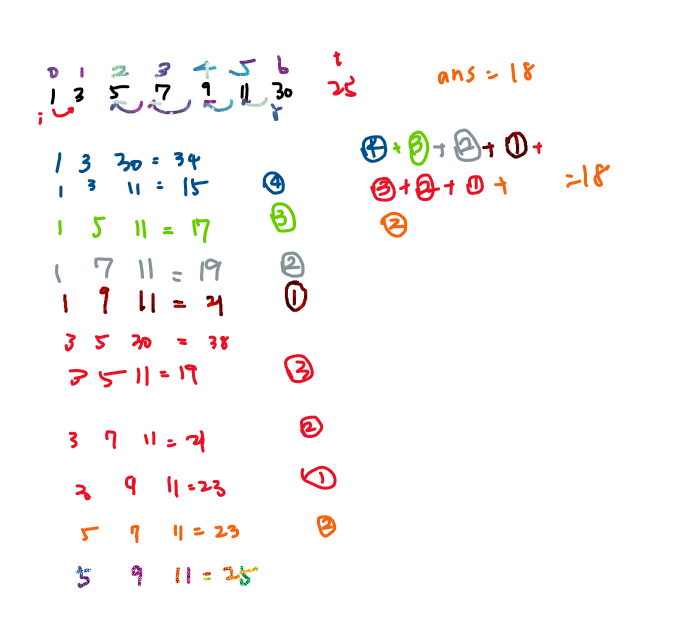

In [ ]:
def threesum(lst:list[int],target:int) -> int:
    if lst[0] > target:
        return 0
    res = 0
    for i in range(len(lst) - 2):
        if sum(lst[i:i + 3]) >= target:
            break
        right = len(lst) - 1
        left = i + 1
        while left < right:
            tempsum = lst[i] + lst[left] + lst[right]
            if tempsum < target:
                res += right - left
                left += 1
            else:
                right -= 1
    return res
            
lst =[int(num) for num in input().split()]
target = int(input())

res = threesum(lst, target)
print(res)

1 3 5 7 9 11
18
10


In [ ]:
from bisect import bisect_left
def threesum(lst: list[int], target: int) -> int:
    if lst[0] > target:
        return 0
    
    n = len(lst)
    res = 0
    
    for i in range(n - 2):      
        for left in range(i + 1, n - 1):
            if sum(lst[i:i + 3]) >= target:
                break
            
            complement = target - lst[i] - lst[left]
            right_add1 = bisect_left(lst, complement, left + 1, n)
            res += (right_add1 - 1) - left
                
    return res
lst =[int(num) for num in input().split()]
target = int(input())

res = threesum(lst, target)
print(res)

1 3 5 7 9 11
18
10
